# Mission trend for upper limit on aspect solution RMS error

Using the method described in the `sim_asol_centroids` notebook, this plots the mission trend of the upper limit on 1-axis aspect solution RMS error.

In [1]:
from mica.vv import get_rms_data
from astropy.table import Table
import matplotlib.pyplot as plt
from Ska.Matplotlib import plot_cxctime
from astropy.time import Time
%matplotlib inline

In [2]:
# Get the mica table of V&V data
dat = Table(get_rms_data())

In [4]:
# Filter table to select only useful and final data
datm = dat['obsid isdefault tstart  used slot type dy_rms dz_rms'.split()]
ok = (dat['type'] == 'GUIDE') & (dat['used'] == 1) & (dat['isdefault'] == 1)
datm = datm[ok]
datm.sort('obsid')
datm

obsid,isdefault,tstart,used,slot,type,dy_rms,dz_rms
int32,int32,float64,int32,int32,string80,float64,float64
2,1,69272595.7775,1,3,GUIDE,0.0364270326139,0.0360691427786
2,1,69272595.7775,1,5,GUIDE,0.0411715255054,0.0442287745192
2,1,69272595.7775,1,4,GUIDE,0.0556809854887,0.038010873714
2,1,69272595.7775,1,7,GUIDE,0.0574426287559,0.0601175648845
2,1,69272595.7775,1,6,GUIDE,0.0565668420226,0.0494141196356
5,1,80301654.6078,1,3,GUIDE,0.0436209288956,0.0366183758036
5,1,80301654.6078,1,5,GUIDE,0.0398383547655,0.0357611319025
5,1,80301654.6078,1,4,GUIDE,0.0572576844241,0.0505640839199
5,1,80301654.6078,1,7,GUIDE,0.0411949994465,0.0453628024224


In [5]:
# Group by obsid
datmg = datm['obsid tstart dy_rms dz_rms'.split()].group_by('obsid')

In [6]:
datmg.groups[1]

obsid,tstart,dy_rms,dz_rms
int32,float64,float64,float64
5,80301654.6078,0.0436209288956,0.0366183758036
5,80301654.6078,0.0398383547655,0.0357611319025
5,80301654.6078,0.0572576844241,0.0505640839199
5,80301654.6078,0.0411949994465,0.0453628024224
5,80301654.6078,0.0541942173107,0.0517387509416


In [7]:
# Select the minimum within each obsid
datmg_min = datmg.groups.aggregate(np.min)

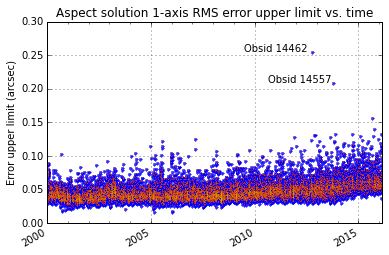

In [8]:
# Make the plot
dyz_rms = np.maximum(datmg_min['dy_rms'], datmg_min['dz_rms'])
for sym, alpha in (('.b', 0.8), (',r', 0.5), (',y', 0.15)):
    plot_cxctime(datmg_min['tstart'], dyz_rms, sym, alpha=alpha)
plt.grid()
plt.text(Time('2013:240').plot_date, 0.21, 'Obsid 14557', ha='right')
plt.text(Time('2012:180').plot_date, 0.255, 'Obsid 14462', ha='right')
plt.ylabel('Error upper limit (arcsec)');
plt.title('Aspect solution 1-axis RMS error upper limit vs. time');

**Figure 1** - Using the method described in the `sim_asol_centroids` notebook, this plot shows the mission trend of the upper limit on 1-axis aspect solution RMS error.

In [9]:
# Show outliers
ok = dyz_rms > 0.2
datmg_min[ok]

obsid,tstart,dy_rms,dz_rms
int32,float64,float64,float64
14462,465928380.69,0.254792472566,0.0955898798809
14557,497795872.266,0.186924259725,0.207943853981


- Obsid 14462 had gyro yaw bias problems
- Obsid 14557 had huge systematic errors across most slots (reason??)